# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +29.29261710546                   -1.32    6.55s
  2   +20.59043562490        0.94       -0.75   10.5ms
  3   +14.46990086573        0.79       -0.21   10.4ms
  4   +11.44024142401        0.48       -0.39   10.4ms
  5   +10.38693275323        0.02       -0.71   8.42ms
  6   +9.713150258236       -0.17       -0.82   8.36ms
  7   +9.136330584109       -0.24       -1.00   8.40ms
  8   +8.618157435745       -0.29       -0.96   8.51ms
  9   +8.259323193632       -0.45       -0.94   8.35ms
 10   +8.090500748410       -0.77       -0.98   8.41ms
 11   +7.994504820458       -1.02       -0.95   8.34ms
 12   +7.976946053170       -1.76       -1.03   6.35ms
 13   +7.916587160084       -1.22       -1.07   6.45ms
 14   +7.858569704962       -1.24       -1.06   6.40ms
 15   +7.812963569915       -1.34       -0.93   8.54ms
 16   +7.786482550135       -1.58       -1.15   6.60ms
 17   +7.77

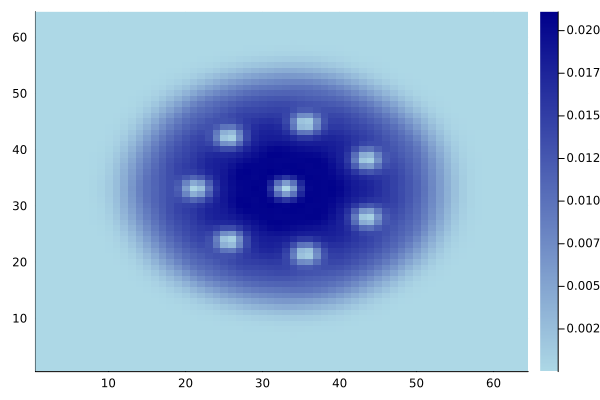

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)